# Collaboration and competition

This is the main interface file corresponding to the Collaboration and competition (tennis) exercise. Here, all of the plots and checkpoints are generated.

Contents:
* [Imports](#first-bullet)
* [Set up environment](#second-bullet)
* [Set up training functions](#third-bullet)
* [Results](#fourth-bullet)

## 1 - Imports<a class="anchor" id="first-bullet"></a>
In this subsection, we import the relevant source code and UnityEngine. We also import auxiliarry imports which are useful for us.

In [1]:
import numpy as np
import src as CollabAndComp
import torch
import torch.optim as optim#
import matplotlib.pyplot as plt
import os
from collections import deque

In [2]:
import sys
DRL_LOCATION = os.environ['_DRL_LOCATION_']
sys.path.insert(0,DRL_LOCATION)
from unityagents import UnityEnvironment
TENNIS_LOCATION = os.environ['_TENNIS_LOCATION_']

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

## 2 - Set up environment<a class="anchor" id="second-bullet"></a>
Here we set up the environment from UnityEngine. However, we wrap this around our bespoke environment wrapper in order to make 'env' behave more like the OpenAI environments.

In [3]:
_env_ = UnityEnvironment(file_name=TENNIS_LOCATION)
env = CollabAndComp.Environment(_env_)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


## 3 - Set up training functions<a class="anchor" id="third-bullet"></a>
In this section we set up the relevant functions for training

In [4]:
# MADDPG function

def maddpg(agents, winning_score = 0.5,n_episodes=10000, print_every = 10):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_window = deque(maxlen=100)
    scores_all = []
    moving_average = []
    
    date_and_time_string = CollabAndComp.util.date_and_time()
    folder_destination = "results/" + "/" + date_and_time_string
    CollabAndComp.util.if_folder_not_there_create(folder_destination)
    new_folder = CollabAndComp.util.folder_number(folder_destination)
    folder_destination = folder_destination+"//"+new_folder

    for i_episode in range(1, n_episodes+1):
        states = env.reset()                                                      
        states = np.reshape(states, (1,48))
        agents.reset()
        scores = np.zeros(2)
        while True:
            actions = agents.act(states)
            next_states, rewards, dones = env.step(actions)         
            next_states = np.reshape(next_states, (1, 48)) 
            agents.step(states, actions, rewards, next_states, dones)
            scores += np.max(rewards)                          
            states = next_states                               
            if np.any(dones):                               
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        current_window_mean = np.mean(scores_window)
        moving_average.append(current_window_mean)
        
        if np.mean(scores_window) > winning_score:
            agents.save(folder_destination, True)
            print('Number of episodes problem is solved in: ',i_episode,' with average score ',current_window_mean)
            break

        
        # print results
        if i_episode % print_every == 0:
            print('Episode ',i_episode,'with current moving average ',current_window_mean)
            
            
    return scores_all, moving_average, folder_destination

## 4 - Results<a class="anchor" id="fourth-bullet"></a>

This is the main section where the results a computed and displayed. We consider one policy gradient algorithm:

    - Deep deterministic policy gradient

We produce a plot which can be seen by scrolling down through the intermediate results of each run.

In [5]:
state_size = 24
action_size = 2
agent_0 = CollabAndComp.Agent(state_size, action_size, random_seed=0)
agent_1 = CollabAndComp.Agent(state_size, action_size, random_seed=0)
agents = CollabAndComp.Agents(agent_0, agent_1)

In [6]:
scores, avgs, folder_destination = maddpg(agents)

Episode  10 with current moving average  0.0
Episode  20 with current moving average  0.0
Episode  30 with current moving average  0.0033333333830038708
Episode  40 with current moving average  0.007500000111758709
Episode  50 with current moving average  0.011800000220537185
Episode  60 with current moving average  0.013166666900118192
Episode  70 with current moving average  0.014142857385533197
Episode  80 with current moving average  0.01487500024959445
Episode  90 with current moving average  0.014333333571751912
Episode  100 with current moving average  0.014900000244379043
Episode  110 with current moving average  0.014900000244379043
Episode  120 with current moving average  0.021800000369548798
Episode  130 with current moving average  0.028800000473856925
Episode  140 with current moving average  0.030700000524520873
Episode  150 with current moving average  0.028800000473856925
Episode  160 with current moving average  0.036800000593066214
Episode  170 with current moving av

Episode  1340 with current moving average  0.13000000193715094
Episode  1350 with current moving average  0.13200000196695327
Episode  1360 with current moving average  0.12800000190734864
Episode  1370 with current moving average  0.1260000018775463
Episode  1380 with current moving average  0.12400000184774398
Episode  1390 with current moving average  0.13600000202655793
Episode  1400 with current moving average  0.14600000217556952
Episode  1410 with current moving average  0.16900000251829625
Episode  1420 with current moving average  0.19700000293552875
Episode  1430 with current moving average  0.1980000029504299
Episode  1440 with current moving average  0.19900000296533107
Episode  1450 with current moving average  0.2039000030606985
Episode  1460 with current moving average  0.2249000033736229
Episode  1470 with current moving average  0.23090000346302986
Episode  1480 with current moving average  0.23390000350773335
Episode  1490 with current moving average  0.24090000361204

In [7]:
def plot(ma_scores, folder):
    ax = plt.subplots(figsize=(20, 10))
    plt.plot(np.arange(len(scores)), ma_scores, label = 'Moving average scores')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.legend(loc='upper left')
    plt.savefig(folder+"/plot.png")
    plt.show()

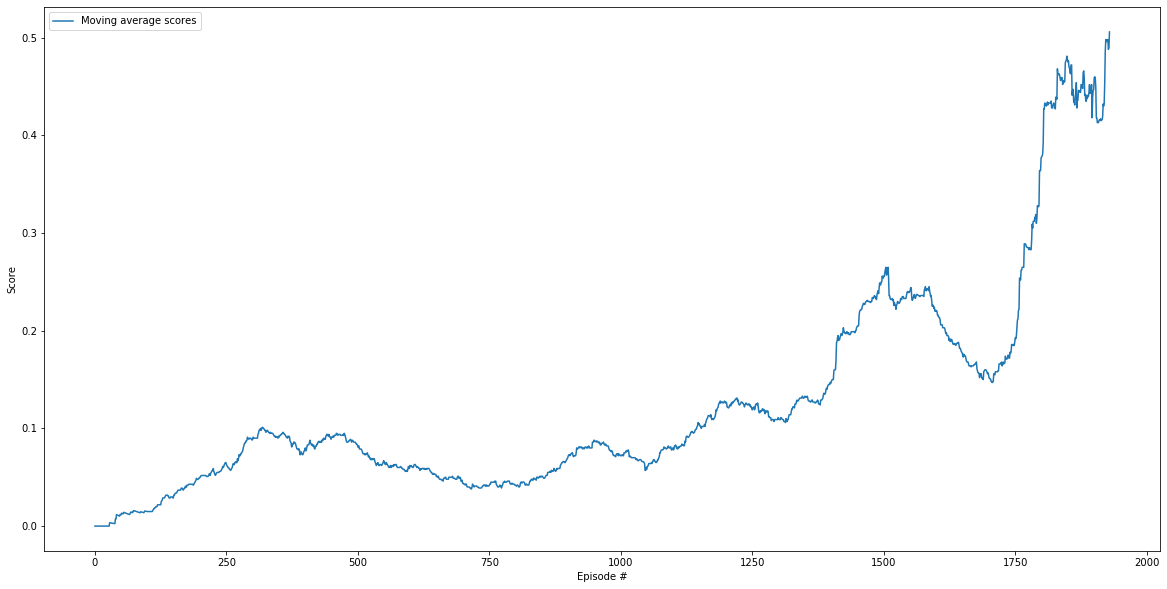

In [8]:
plot(avgs, folder_destination)

In [13]:
#PLAY!
states = env.reset(False)                                                      
states = np.reshape(states, (1,48))

scores = np.zeros(2)
for i in range(0,500):
    actions = agents.act(states)
    next_states, rewards, dones = env.step(actions)
    next_states = np.reshape(next_states, (1, 48)) 
    scores += np.max(rewards)                          
    states = next_states                               